In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# read the CSV files into pandas dataframes
df_glove = pd.read_csv('all_sim.csv')
df_manual = pd.read_csv('all_sim_AfterChange.csv')

# extract the embeddings from the dataframes
embeddings_glove = df_glove.iloc[:, 1:].values
embeddings_manual = df_manual.iloc[:, 1:].values

# calculate cosine similarity between the two sets of embeddings
similarity = cosine_similarity(embeddings_glove, embeddings_manual)

print(similarity)


# calculate the average similarity score
avg_similarity = similarity.mean()

print(avg_similarity)

FileNotFoundError: [Errno 2] No such file or directory: 'all_sim-50d.csv'

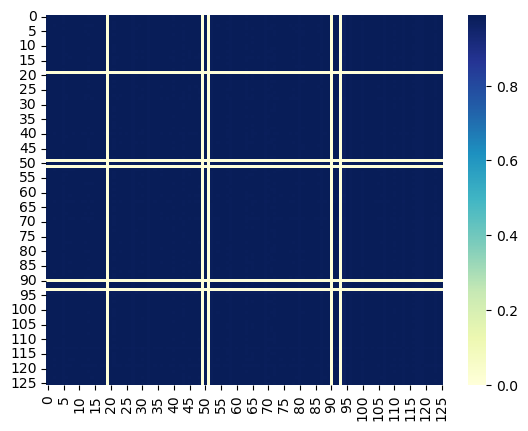

In [3]:
sns.heatmap(similarity, cmap="YlGnBu")
plt.show()

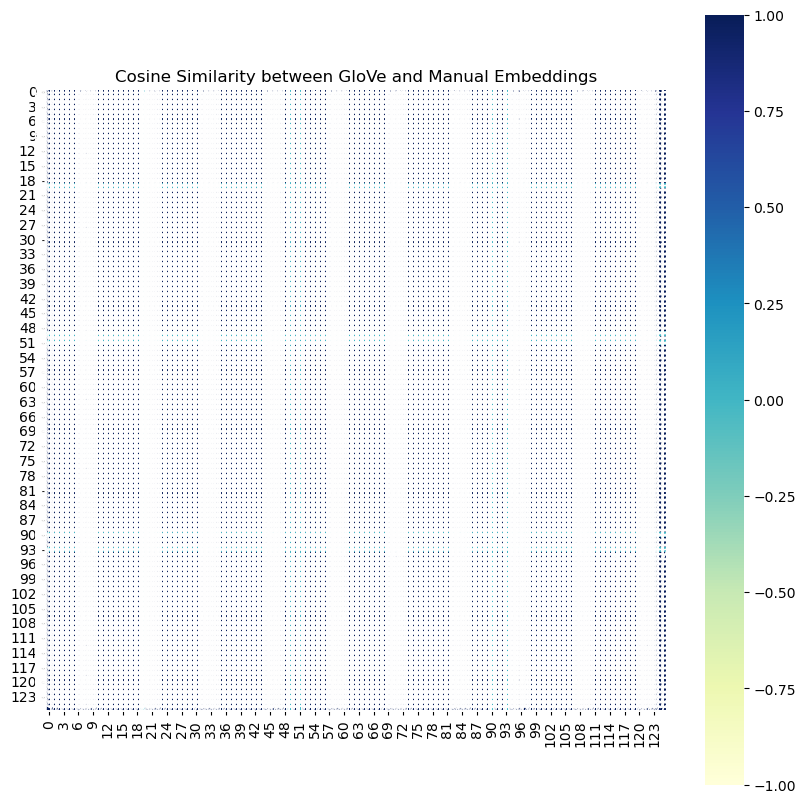

In [4]:
# set up the heatmap figure
plt.figure(figsize=(10, 10))
plt.title('Cosine Similarity between GloVe and Manual Embeddings')
plt.xlabel('Manual Embeddings')
plt.ylabel('GloVe Embeddings')

# visualize the similarity matrix as a heatmap
sns.heatmap(similarity, cmap="YlGnBu", annot=True, vmin=-1, vmax=1, center=0, square=True, fmt=".2f")

# show the plot
plt.show()

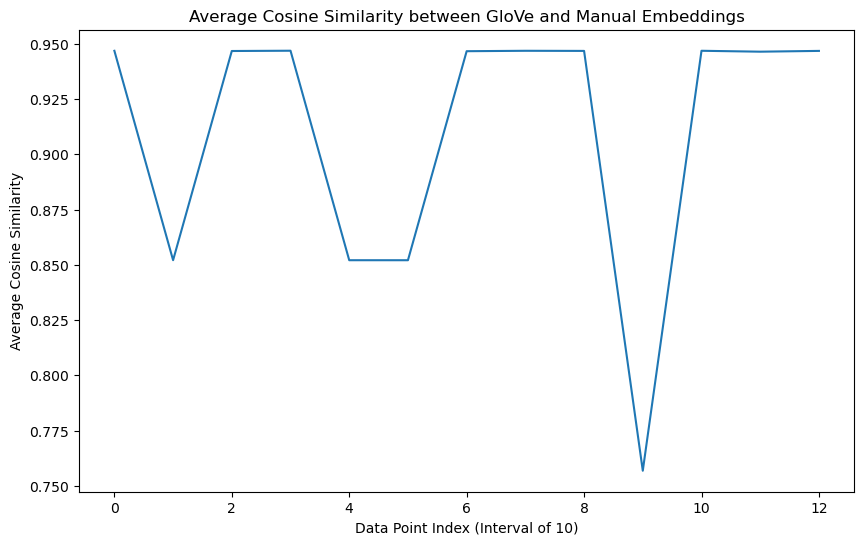

In [5]:
# calculate the average similarity score for each interval of 10 data points
interval_size = 10
n_data_points = similarity.shape[0]
avg_similarity = [similarity[i:i+interval_size,:].mean() for i in range(0, n_data_points, interval_size)]

# set up the line plot figure
plt.figure(figsize=(10, 6))
plt.title('Average Cosine Similarity between GloVe and Manual Embeddings')
plt.xlabel('Data Point Index (Interval of {})'.format(interval_size))
plt.ylabel('Average Cosine Similarity')

# plot the average similarity scores as a line plot
plt.plot(avg_similarity)

# show the plot
plt.show()

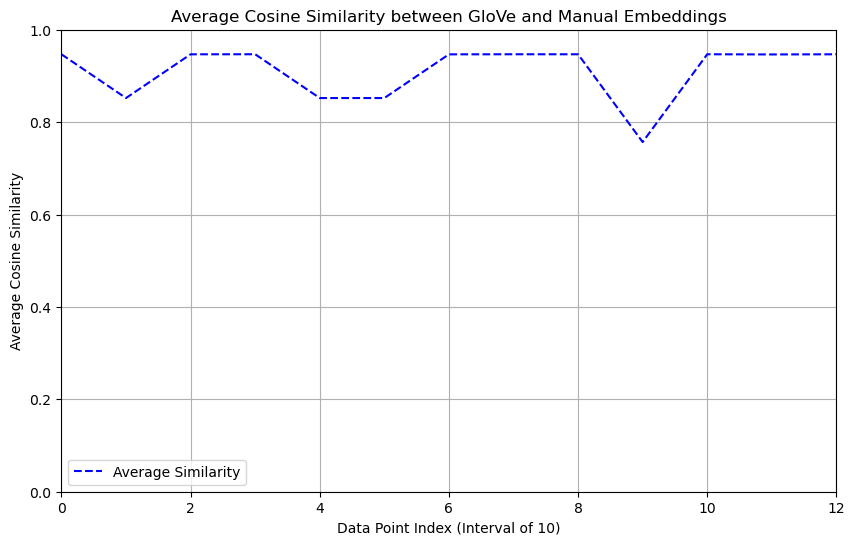

In [9]:
# set up the line plot figure
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Average Cosine Similarity between GloVe and Manual Embeddings')
ax.set_xlabel('Data Point Index (Interval of {})'.format(interval_size))
ax.set_ylabel('Average Cosine Similarity')
ax.grid(True)

# plot the average similarity scores as a line plot
ax.plot(avg_similarity, 'b--', label='Average Similarity')

# add legend and axis limits
ax.legend(loc='best')
ax.set_xlim([0, n_data_points // interval_size])
ax.set_ylim([0, 1])

# show the plot
plt.show()
